<center> <h1>PREDICIÓN DEL SUEÑO CON SVM LINEAL MULTICLASE</h1> </center>
<center> <h4>Noemi González, Roberto Holgado y Carmen Plaza seco</h4> </center>


###### Índice de contenidos

En este jupyter notebook se lleva a cabo la construcción de un clasificador SVM lineal de salida multiclase para predecir en distintos sujetos las distintas fases.
    
    1. Clasficador SVM lineal Multiclase
        1.1 Preparación datos de entrada y salida
        1.2 Creación del modelo y selección parámetros libres
        1.3 Búsqueda de parámetros con validación cruzada
        1.4 Evaluación del modelo
        1.5 Visualización de resultados

In [1]:
import os
import random
import numpy as np
import pandas as pd
from random import sample
import statistics as stats
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import RandomizedSearchCV

## 1. SVM LINEAL MULTICLASE

Este clasificador SVM tiene una salida multiclase y clasifica tanto el estado de vigilia como las distintas etapas de sueño ligero y profundo: 0,1,2,3,5.

### 1.1 Preparación datos de entrada y salida

In [2]:
Train_multi= pd.read_csv('Train_multiclass.csv')
Test_multi= pd.read_csv('Test_multiclass.csv')

In [3]:
X_train_multi=Train_multi.drop(['Etiquetas multiclase', 'Etiquetas binarias','ID'], axis = 1) 
y_train_multi=Train_multi['Etiquetas multiclase']

# SELECCIÓN 1 PACIENTE
ids= Test_multi['ID']
pacientes=list(set(ids))
paciente=random.choice(pacientes)

X_test_multi=Test_multi.drop(['Etiquetas binarias'], axis = 1)
X_test_multi = X_test_multi.drop(X_test_multi[X_test_multi['ID']!=paciente].index)
y_test_multi=X_test_multi['Etiquetas multiclase']
X_test_multi = X_test_multi.drop(['ID','Etiquetas multiclase'],axis=1)

### 1.2 Creación del modelo y selección parámetros libres

In [4]:
clf = SVC(kernel='linear', decision_function_shape='ovr')
modelo_base=clf.fit(X_train_multi,y_train_multi)

### 1.3 Búsqueda de parámetros con validación cruzada

In [5]:
Cs =[0.1,1,10,100,1000] 
param_grid = {'C': Cs} 
svc_grid = GridSearchCV(clf, param_grid, scoring='accuracy',cv=5,n_jobs=-1)
svc_grid.fit(X_train_multi, y_train_multi)
best_param=svc_grid.best_params_

In [6]:
svc_clf=svc_grid.best_estimator_

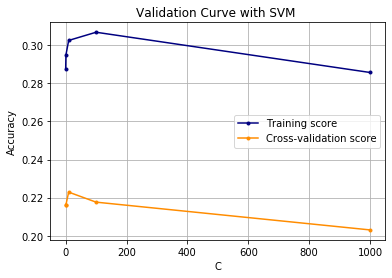

In [7]:
train_scores, test_scores = validation_curve(clf, X_train_multi, y_train_multi, param_name="C", param_range=Cs,cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.title("Validation Curve with SVM ")
plt.xlabel('C')
plt.ylabel("Accuracy")

plt.plot(Cs, train_scores_mean, label="Training score",color="navy",marker='.')
plt.plot(Cs, test_scores_mean, label="Cross-validation score",color="darkorange",marker='.')
plt.grid()
plt.legend(loc="best")
plt.show()

In [8]:
print("C que maximiza la accuracy:",best_param)

C que maximiza la accuracy: {'C': 10}


In [9]:
print("Tasa de acierto del modelo base:",modelo_base.score(X_test_multi,y_test_multi))
print("Tasa de acierto con la busqueda de parámetros:",svc_clf.score(X_test_multi,y_test_multi))
print('Mejora  del {:0.2f}%.'.format( 100 * (svc_clf.score(X_test_multi,y_test_multi) - modelo_base.score(X_test_multi,y_test_multi)) / modelo_base.score(X_test_multi,y_test_multi)))

Tasa de acierto del modelo base: 0.30952380952380953
Tasa de acierto con la busqueda de parámetros: 0.30952380952380953
Mejora  del 0.00%.


### 1.4 Evaluación del modelo

In [10]:
predict = svc_clf.predict(X_test_multi)

acc_test= svc_clf.score(X_test_multi, y_test_multi).round(4)
acc_train= svc_clf.score(X_train_multi, y_train_multi).round(4)

print('La exactitud para el modelo de SVM en el conjunto de TEST es:',acc_test,'\n')
print('La exactitud para el modelo de SVM en el conjunto de TRAIN es:',acc_train,'\n')

print("=============== Classification Report ================")
print(classification_report(y_test_multi, predict))

La exactitud para el modelo de SVM en el conjunto de TEST es: 0.3095 

La exactitud para el modelo de SVM en el conjunto de TRAIN es: 0.2823 

=============== Classification Report ================
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.25      1.00      0.40         9
         2.0       1.00      0.14      0.25         7
         3.0       0.00      0.00      0.00        11
         5.0       0.60      0.21      0.32        14

    accuracy                           0.31        42
   macro avg       0.37      0.27      0.19        42
weighted avg       0.42      0.31      0.23        42



C:\Users\rober\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
matriz_confusion=pd.crosstab(y_test_multi,predict, rownames=['Clase predicha'], colnames=['Resultado del clasificador'])
matriz_confusion

Resultado del clasificador,1.0,2.0,5.0
Clase predicha,,,
0.0,1,0,0
1.0,9,0,0
2.0,4,1,2
3.0,11,0,0
5.0,11,0,3


### 1.5 Visualización de resultados

In [12]:
y_test_multi=list(y_test_multi)

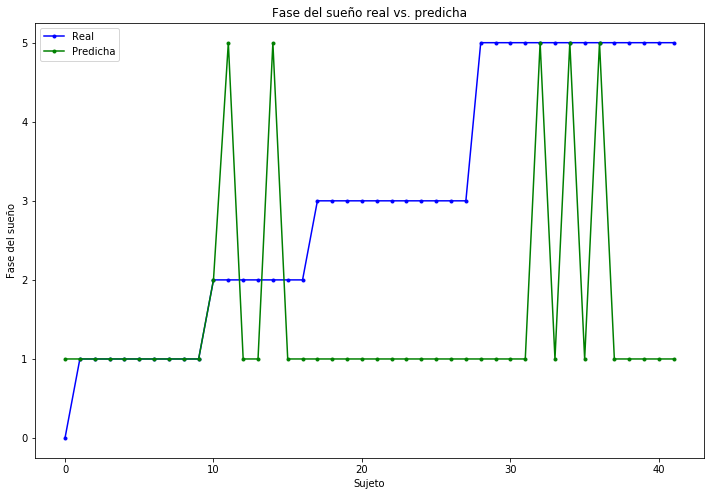

In [13]:
plt.figure(figsize=(12,8))
plt.plot(y_test_multi,color='blue', marker='.',label='Real')
plt.plot(predict,color='green', marker='.',label='Predicha')

plt.title('Fase del sueño real vs. predicha')
plt.xlabel('Sujeto')
plt.ylabel('Fase del sueño')
plt.legend()

**Residuos**

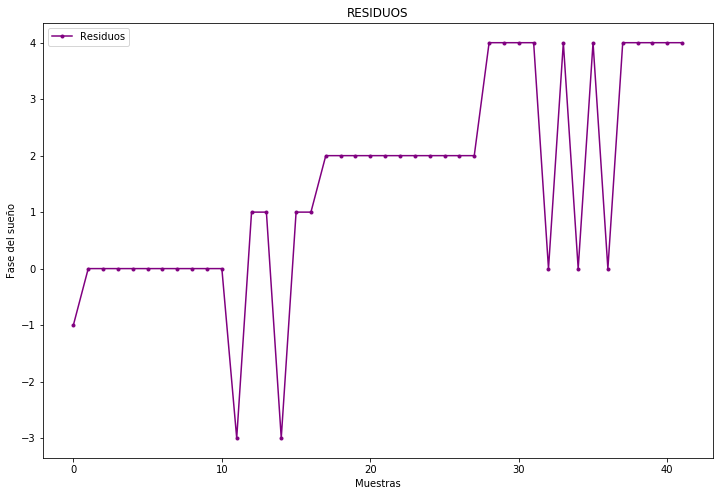

In [14]:
residuos= y_test_multi - predict
plt.figure(figsize=(12,8))
plt.plot(residuos[0:90],color='purple', marker='.',label='Residuos')

plt.title('RESIDUOS')
plt.xlabel('Muestras')
plt.ylabel('Fase del sueño')
plt.legend()